In [ ]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.23 MiB | 33.69 MiB/s, done.
Resolving deltas: 100% (2418/2418), done.


In [ ]:
!ls

fastText  sample_data


In [ ]:
!sudo pip install fastText/.

Processing ./fastText
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3015201 sha256=460eb681dbd28bb5fc27e6d460c4fd81f7521857117ac8daacb8dbbcfc4c5e8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-eo9lc78m/wheels/a1/9f/52/696ce6c5c46325e840c76614ee5051458c0df10306987e7443
Successfully built fasttext


In [ ]:
!ls

fastText  sample_data


In [ ]:
!cd fastText

In [ ]:
!ls

fastText  sample_data


In [ ]:
import fasttext.util

In [ ]:
fasttext.util.download_model('fa', if_exists='ignore')

'cc.fa.300.bin'

In [ ]:
ft = fasttext.load_model('cc.fa.300.bin')

In [ ]:
ft.get_nearest_neighbors('سلام')

[(0.7062562704086304, 'سلامو'),
 (0.7010449767112732, 'باسلام'),
 (0.6782733201980591, 'درود'),
 (0.6445516347885132, 'سلام.ضمن'),
 (0.6404579281806946, 'عزیز.بنده'),
 (0.6391009092330933, 'عزیزسلام'),
 (0.6373170018196106, 'سلاممم'),
 (0.6371632814407349, 'سلام.اقا'),
 (0.637017011642456, 'عزیز.با'),
 (0.6366755962371826, 'شمامن')]

In [ ]:
ft.get_nearest_neighbors('طلا')

[(0.694230854511261, 'طلای'),
 (0.6849290728569031, 'طلاو'),
 (0.6164087057113647, 'طلابه'),
 (0.6109494566917419, 'نقره'),
 (0.5962421298027039, 'جواهر'),
 (0.5737359523773193, 'سکه'),
 (0.5678431987762451, 'طلاوجواهر'),
 (0.5546823143959045, 'وجواهر'),
 (0.5541793704032898, 'طلادر'),
 (0.5481424331665039, 'طلاسکه')]

In [ ]:
ft.get_nearest_neighbors('ماشین')

[(0.6747990250587463, 'ازماشین'),
 (0.6507582068443298, 'ماشینهای'),
 (0.6458106637001038, 'وماشین'),
 (0.6424431800842285, 'ماشین\u200cهای'),
 (0.6340875625610352, 'ماشینماشین'),
 (0.629118025302887, 'تولیدماشین'),
 (0.6223403215408325, 'اتومبیل'),
 (0.6012367606163025, 'خریدماشین'),
 (0.5977076292037964, 'است.ماشین'),
 (0.5947739481925964, 'ماشین\xad')]

In [ ]:
import numpy as np

np.dot(ft.get_word_vector('طلا'), ft.get_word_vector('نقره'))

1.2921867

In [ ]:
np.dot(ft.get_word_vector('طلا'), ft.get_word_vector('چیپس'))

0.48538145

In [ ]:
np.dot(ft.get_word_vector('طلا'), ft.get_word_vector('طلایی'))

0.5125714

In [ ]:
np.dot(ft.get_word_vector('رنگ'), ft.get_word_vector('طلایی'))

0.47277766

In [ ]:
np.dot(ft.get_word_vector('رنگ'), ft.get_word_vector('طلا'))

0.69546974

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df = pd.read_csv('data.csv')
print(df['Suggestion'].unique())
df

[1 3 2]


,Text,Score,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1
1,خرید این محصول رو توصیه میکنم,84,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1
...,...,...,...
3256,کیفت ساختش خوبه تنوعش هم خوبه فقط مشکلش اینه...,84,2
3257,خیلی خوب و به درد بخوره و اندازشم عالیه,100,1
3258,عالیه خیلی دوسش دارم قیمتش یه کم زیاده ولی به ...,100,1
3259,من این مینی فرز رو از دیحیکالا سفارش دادم و به...,84,1


In [ ]:
texts = df['Text'].values
words = list()
for sen in texts:
    words.append(sen.split(' '))
lens = 0
for sen in words:
    lens += len(sen)
print(lens/len(words))

56.590616375344986


In [ ]:
def calculate_lens(x):
    text_list = x['Text'].split(' ')
    return len(text_list)
text_lens = df.apply(calculate_lens, axis=1)
print(df['Text'][6])
text_lens

اول از همه خوشحالم که بالاخره نسخه های 128 گیگابایتی برای فروش قرار گرفت چون همیشه من با حافظه گوشی های اندرویدی مشکل داشتم  گوشی قبلی من s7 بود و بعد از 2 سال استفاده که بسیار هم راضی بودم به دلیل تغییرات مثبتی که در گوشی های سامسونگ ایجاد شد تصمیم گرفتم گوشی رو عوض کنم این گوشی واقعا زیباست و طراحی منحصر به فردی داره  زمانی که گوشی رو در دست میگیرید بسیار خودش دست هست و حس خیلی خوبی داره تنها دلیلی که نسخه پلاس رو انتخاب نکردم بزرگی بیش از حد و وزن گوشی بود ولی این نسخه از نظر اندازه فوق العادست کیفیت و بلندی صدای  اسپیکر  ها عالی هست  زمانی که با گوشی قبلی خودم تست کردم واقعا تفاوت زیادی حس میشد  همچنین با گوشی HTC U11 هم مقایسه کردم و باز هم بلندی صدای اس 9 بیشتر بود اما از نظر کیفیت شاید کمی u11 بهتر بود  نگرانی من جای سنسور اثر انگشت بود چون با اس8 که کار کرده بودم اصلا جای مناسبی نداشت ولی این مشکل با تغییر جای سنسور بنظرم کاملا حل شده و سرعت سنسور هم عالی هست و با وجود Intelligent scan که ترکیب سنسور عنبیه و تشخیص چهره هست خیلی نیازی به اثر انگشت احساس نمیشه چون حتی توی تاریکی 

0        31
1         7
2        14
3        33
4        56
       ... 
3256     23
3257     10
3258     30
3259    102
3260     30
Length: 3261, dtype: int64

In [ ]:
df = df[['Text', 'Score']]
df = df[(df.Score > 70) | (df.Score < 60)]
df
def labelScore(x):
    if x.Score > 70:
        x.Score = 0
    elif x.Score < 60:
        x.Score = 1
    return x

df = df.apply(labelScore, axis=1)
df

,Text,Score
0,این اولین تجربه من برای خرید ایفون هست امروز...,0
1,خرید این محصول رو توصیه میکنم,0
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,0
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,0
6,اول از همه خوشحالم که بالاخره نسخه های 128 گیگ...,0
...,...,...
3256,کیفت ساختش خوبه تنوعش هم خوبه فقط مشکلش اینه...,0
3257,خیلی خوب و به درد بخوره و اندازشم عالیه,0
3258,عالیه خیلی دوسش دارم قیمتش یه کم زیاده ولی به ...,0
3259,من این مینی فرز رو از دیحیکالا سفارش دادم و به...,0


In [ ]:
from sklearn.utils import resample

df_majority = df[df['Score']==0]
df_minority = df[df['Score']==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])

print(df['Score'].value_counts())

1    2015
0    2015
Name: Score, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = df.Text.values
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(texts)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

encoded_docs = tokenizer.texts_to_sequences(texts)

padded_sequence = pad_sequences(encoded_docs, maxlen=70, padding='post')

dict(list(tokenizer.word_index.items())[:20])

10729


{'از': 3,
 'استفاده': 18,
 'این': 5,
 'با': 7,
 'برای': 13,
 'به': 4,
 'بود': 20,
 'خیلی': 11,
 'داره': 15,
 'در': 8,
 'رو': 6,
 'من': 10,
 'می': 19,
 'های': 17,
 'هست': 16,
 'هم': 9,
 'و': 1,
 'ولی': 14,
 'که': 2,
 'کیفیت': 12}

In [ ]:
print(padded_sequence.shape)
print(df.Score.values)
len(df[df['Score'] == 0])

(4030, 70)
[0 0 0 ... 1 1 1]


2015

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequence, df.Score.values, test_size=0.3, shuffle=True)

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))

for word, i in tokenizer.word_index.items():
  embedding_vector = ft.get_word_vector(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

embedding_vector_length = 300

model = Sequential()

model.add(Embedding(vocab_size, embedding_vector_length, input_length=70))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 70, 300)           3218700   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 70, 300)           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                70200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 51        
Total params: 3,288,951
Trainable params: 3,288,951
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/15
71/71 [==============================] - 13s 182ms/step - loss: 0.6912 - accuracy: 0.5341 - val_loss: 0.6924 - val_accuracy: 0.5451
Epoch 2/15
71/71 [==============================] - 13s 178ms/step - loss: 0.6745 - accuracy: 0.5811 - val_loss: 0.6494 - val_accuracy: 0.6035
Epoch 3/15
71/71 [==============================] - 13s 178ms/step - loss: 0.5964 - accuracy: 0.6259 - val_loss: 0.5968 - val_accuracy: 0.6142
Epoch 4/15
71/71 [==============================] - 12s 176ms/step - loss: 0.4893 - accuracy: 0.7402 - val_loss: 0.5294 - val_accuracy: 0.7363
Epoch 5/15
71/71 [==============================] - 13s 177ms/step - loss: 0.3569 - accuracy: 0.8484 - val_loss: 0.4139 - val_accuracy: 0.8177
Epoch 6/15
71/71 [==============================] - 13s 178ms/step - loss: 0.2354 - accuracy: 0.9153 - val_loss: 0.3795 - val_accuracy: 0.8584
Epoch 7/15
71/71 [==============================] - 13s 187ms/step - loss: 0.1904 - accuracy: 0.9353 - val_loss: 0.3798 - val_accuracy: 0.8496

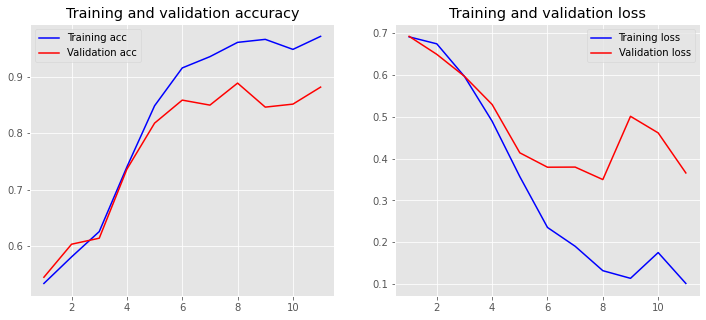

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [ ]:
model.evaluate(X_test, y_test)

38/38 [==============================] - 1s 20ms/step - loss: 0.4062 - accuracy: 0.8850


[0.40622204542160034, 0.8850289583206177]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 300

model = Sequential()

model.add(Embedding(vocab_size, embedding_vector_length, input_length=70,weights=[embedding_matrix],trainable=True))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 70, 300)           3218700   
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 70, 300)           0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 50)                70200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 51        
Total params: 3,288,951
Trainable params: 3,288,951
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/15
71/71 [==============================] - 13s 179ms/step - loss: 0.6907 - accuracy: 0.5266 - val_loss: 0.6867 - val_accuracy: 0.5540
Epoch 2/15
71/71 [==============================] - 12s 175ms/step - loss: 0.6361 - accuracy: 0.6232 - val_loss: 0.6131 - val_accuracy: 0.6319
Epoch 3/15
71/71 [==============================] - 12s 174ms/step - loss: 0.5256 - accuracy: 0.7518 - val_loss: 0.5327 - val_accuracy: 0.7646
Epoch 4/15
71/71 [==============================] - 12s 175ms/step - loss: 0.4725 - accuracy: 0.7886 - val_loss: 0.4886 - val_accuracy: 0.8230
Epoch 5/15
71/71 [==============================] - 12s 175ms/step - loss: 0.4106 - accuracy: 0.8395 - val_loss: 0.4520 - val_accuracy: 0.8212
Epoch 6/15
71/71 [==============================] - 12s 175ms/step - loss: 0.4159 - accuracy: 0.8276 - val_loss: 0.4686 - val_accuracy: 0.7823
Epoch 7/15
71/71 [==============================] - 12s 174ms/step - loss: 0.4062 - accuracy: 0.8254 - val_loss: 0.4122 - val_accuracy: 0.8478

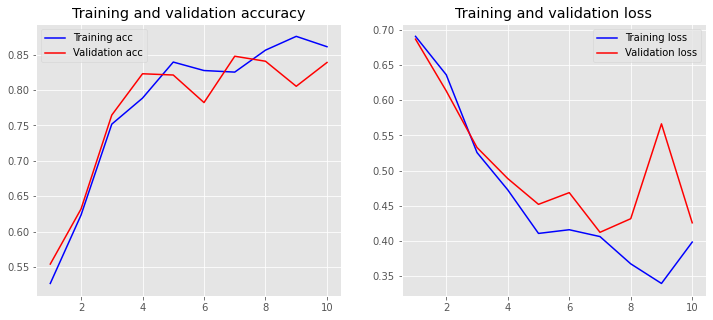

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [ ]:
model.evaluate(X_test, y_test)

38/38 [==============================] - 1s 19ms/step - loss: 0.4206 - accuracy: 0.8428


[0.42059582471847534, 0.8428453207015991]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 300

model = Sequential()

model.add(Embedding(vocab_size, embedding_vector_length, input_length=70,weights=[embedding_matrix],trainable=False))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 70, 300)           3218700   
_________________________________________________________________
spatial_dropout1d_10 (Spatia (None, 70, 300)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 50)                70200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 51        
Total params: 3,288,951
Trainable params: 70,251
Non-trainable params: 3,218,700
_________________________________________________________________
None


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
71/71 [==============================] - 9s 129ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6907 - val_accuracy: 0.5292
Epoch 2/30
71/71 [==============================] - 9s 125ms/step - loss: 0.6870 - accuracy: 0.5262 - val_loss: 0.6843 - val_accuracy: 0.5381
Epoch 3/30
71/71 [==============================] - 9s 125ms/step - loss: 0.6843 - accuracy: 0.5443 - val_loss: 0.6803 - val_accuracy: 0.5752
Epoch 4/30
71/71 [==============================] - 9s 123ms/step - loss: 0.6787 - accuracy: 0.5412 - val_loss: 0.6787 - val_accuracy: 0.5416
Epoch 5/30
71/71 [==============================] - 9s 124ms/step - loss: 0.6728 - accuracy: 0.5598 - val_loss: 0.6698 - val_accuracy: 0.5699
Epoch 6/30
71/71 [==============================] - 9s 124ms/step - loss: 0.6488 - accuracy: 0.6028 - val_loss: 0.6096 - val_accuracy: 0.6673
Epoch 7/30
71/71 [==============================] - 9s 124ms/step - loss: 0.6240 - accuracy: 0.6653 - val_loss: 0.5830 - val_accuracy: 0.7186
Epoch 

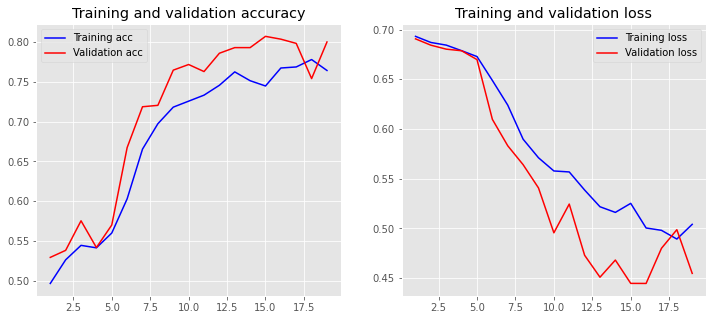

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [ ]:
model.evaluate(X_test, y_test)

38/38 [==============================] - 1s 18ms/step - loss: 0.4899 - accuracy: 0.7800


[0.48991459608078003, 0.7799834609031677]